In [1]:
from collections import Counter, defaultdict
import re
import warnings

import matplotlib.pyplot as plt
import MeCab
import numpy as np
import pandas as pd
import seaborn as sns

from utils.jupyter.settings import DATA_DIR

warnings.filterwarnings('ignore')

sns.set()
plt.rcParams['font.family'] = 'IPAPGothic'  # TO-DO: Check detail and decide to remove or not
%matplotlib inline

In [2]:
NEKO_FILEPATH = DATA_DIR.joinpath('neko.txt')
NEKO_MECAB_FILEPATH = DATA_DIR.joinpath('neko.txt.mecab')

# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）を MeCab を使って形態素解析し, その結果を neko.txt.mecab というファイルに保存せよ. このファイルを用いて, 以下の問に対応するプログラムを実装せよ.

なお，問題[37](#37), [38](#38), [39](#39)は [matplotlib](http://matplotlib.org/) もしくは [Gnuplot](http://www.gnuplot.info/) を用いるとよい.

In [3]:
with NEKO_FILEPATH.open() as f:
    lines = f.read()[1:]  # Ignore the first line '-'    
lines = re.sub(r"[\n\u3000]", r"", lines)    

In [4]:
m = MeCab.Tagger()

In [5]:
tagged = m.parse(lines)

In [6]:
with NEKO_MECAB_FILEPATH.open('w') as f:
    f.write(tagged)

## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ. ただし, 各形態素は表層形（```surface```）, 基本形（```base```）, 品詞（```pos```）, 品詞細分類1（```pos1```）をキーとするマッピング型に格納し, 1文を形態素（マッピング型）のリストとして表現せよ. 第4章の残りの問題では, ここで作ったプログラムを活用せよ.

In [7]:
def get_mapping(line: str) -> dict:
    """Define a map or dict containing part-of-speech information."""
    line = line.strip()
    tab_splitted = line.split('\t')
    surface = tab_splitted[0]
    comma_splitted = tab_splitted[1].split(',')
    base, pos, pos1 = comma_splitted[-3], comma_splitted[0], comma_splitted[1]
    return {'surface': surface, 'base': base, 'pos': pos, 'pos1': pos1}

In [8]:
with NEKO_MECAB_FILEPATH.open() as f:
    tagged = f.readlines()

In [9]:
sents = []
sent = []
for line in tagged[:-1]:  # Ignore EOF symbol in the last row
    sent += [get_mapping(line)]
    if line[0] == '。':
        sents += [sent]
        sent = []

## 31. 動詞

動詞の表層形をすべて抽出せよ.

In [10]:
verb_surfaces = [
    mapping['surface'] for sent in sents 
                       for mapping in sent if mapping['pos'] == '動詞'
]

# Output only the first 100 results
print(verb_surfaces[:100])

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ', '廻り']


## 32. 動詞の原形

動詞の原形をすべて抽出せよ.

In [11]:
verb_bases = [
    mapping['base'] for sent in sents
                    for mapping in sent if mapping['pos'] == '動詞'
]

# Output only the first 100 results
print(verb_bases[:100])

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る']


## 33. サ変名詞

サ変接続の名詞をすべて抽出せよ.

In [12]:
nouns_sahen_concated = [
    mapping['base'] for sent in sents for mapping in sent 
                    if mapping['pos'] == '名詞' and mapping['pos1'] == 'サ変接続'
]

# Output only the first 100 results
print(nouns_sahen_concated[:100])

['見当', '記憶', '話', '装飾', '突起', '運転', '記憶', '分別', '決心', '我慢', '餓死', '訪問', '始末', '猶予', '遭遇', '我慢', '記憶', '返報', '勉強', '勉強', '昼寝', '珍重', '昼寝', '経験', '供', '供', '供', '供', '*', '*', '同居', '観察', '断言', '同衾', '供', '迫害', '尊敬', '生活', '剿滅', '議論', '所有', '憤慨', '観念', '御馳走', '掠奪', '代言', '我儘', '我儘', '失敗', '話', '投書', '関', '決心', '昼寝', '鑑定', '話', '述懐', '想像', '写生', '感心', '昼寝', '失笑', '揶揄', '写生', '欠伸', '自白', '彩色', '写生', '判然', '心中', '感服', '小便', '猶予', '失敬', '欠伸', '予定', '失望', '漫罵', '小便', '増長', '増長', '我儘', '我慢', '報道', '供', '昼寝', '退屈', '加減', '一睡', '運動', '嘆賞', '佇立', '記憶', '珍重', '身動き', '挨拶', '鼓動', '軽蔑', '察', '肥満']


## 34. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ.

In [13]:
noun_phrases = []
for sent in sents:
    for i, mapping in enumerate(sent[:-1]):  # Ignore '。' in the last row
        if mapping['base'] == 'の':
            try:
                first, second = sent[i-1], sent[i+1]
            except IndexError as e:
                print(e)
            else:
                if first['pos'] == '名詞' and second['pos'] == '名詞':
                    noun_phrase = first['base'] + 'の' + second['base']
                    noun_phrases += [noun_phrase]
                    
# Output only the first 100 results
print(noun_phrases[:100])                    

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の*', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '*の猫', '斑入りの皮膚']


## 35. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ.

In [14]:
composite_nouns = []
for sent in sents:
    for i in range(len(sent[:-1])):
        composite_noun_list = []
        if sent[i]['pos'] == '名詞' and sent[i]['base'] != '*':
            composite_noun_list += [sent[i]['base']]
            j = i + 1
            while sent[j]['pos'] == '名詞' and sent[j]['base'] != '*':
                composite_noun_list += [sent[j]['base']]
                j += 1          
            if len(composite_noun_list) >= 2:
                composite_noun = "".join(composite_noun_list)
                composite_nouns += [composite_noun]
        i = j + 1
        
# Output only the first 100 results        
print(composite_nouns[:100])

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', '邸内', '三毛', '書生以外', '四五遍', '五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '神経胃弱性', '胃弱性', '物指', '言語同断', '家内総がかり', '総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '三日目', '日目', '白君', '我等猫族', '等猫族', '猫族', '家族的生活', '的生活', '三毛君', '毛君', '所有権', '我々同族間', '同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛君', '毛君', 'いくら人間', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '露華', '寒鴉', 'これ一幅', '一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', 'ただ一種', '一種', '上不思議', '盲猫', '心中ひそか', '一分', 'あと大', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎呼わり', '野郎呼わり', '呼わり', '平生吾輩', '馬鹿野郎']


## 36. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め, 出現頻度の高い順に並べよ.

In [15]:
words = [mapping['base'] for sent in sents for mapping in sent]
word_freqs = [(key, value) for key, value in Counter(words).items()]
word_freqs = sorted(word_freqs, key=lambda x: x[1], reverse=True)

# Output only the first 100 results
print(word_freqs[:100])

[('の', 9194), ('。', 7484), ('て', 6853), ('、', 6772), ('は', 6422), ('に', 6269), ('を', 6071), ('だ', 5978), ('と', 5515), ('が', 5339), ('た', 4270), ('する', 3669), ('「', 3226), ('」', 3225), ('ない', 3054), ('も', 2479), ('ある', 2322), ('*', 2191), ('で', 2090), ('から', 2044), ('いる', 1778), ('ん', 1568), ('か', 1530), ('云う', 1408), ('事', 1207), ('です', 1164), ('ます', 1146), ('なる', 1121), ('へ', 1034), ('う', 987), ('もの', 981), ('君', 973), ('主人', 932), ('ぬ', 719), ('よう', 697), ('見る', 675), ('ね', 657), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('そう', 554), ('一', 554), ('何', 539), ('思う', 502), ('よ', 502), ('吾輩', 481), ('来る', 460), ('れる', 450), ('じゃ', 450), ('…', 433), ('これ', 414), ('さ', 409), ('それ', 397), ('聞く', 347), ('でも', 345), ('時', 344), ('行く', 340), ('出来る', 324), ('出る', 317), ('ところ', 315), ('三', 314), ('な', 314), ('まで', 313), ('方', 312), ('やる', 311), ('二', 302), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('くらい', 269), ('僕', 268), ('ごとし', 261), ('さん'

## 37. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ.

In [16]:
word_freqs = np.array(word_freqs)

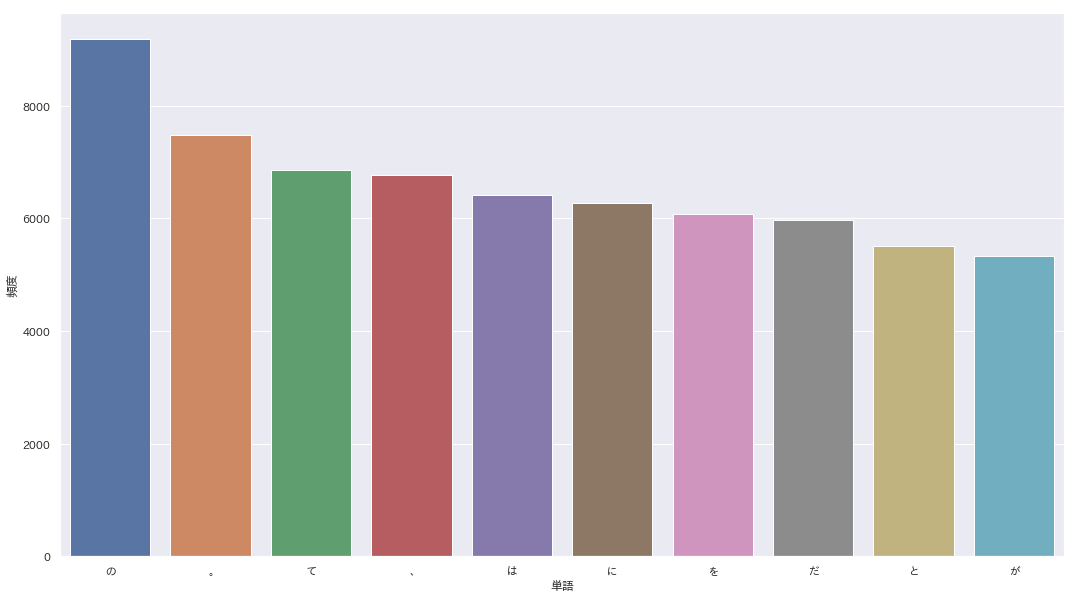

In [17]:
words_top10 = word_freqs[:10, 0]
freqs_top10 = word_freqs[:10, 1].astype('int')
df_word_freqs_top10 = pd.DataFrame({'単語': words_top10, '頻度': freqs_top10})

fig, ax = plt.subplots(1, 1, figsize=(18, 10))
sns.barplot(x="単語", y="頻度", data=df_word_freqs_top10, ax=ax)
fig.show()

## 38. ヒストグラム

単語の出現頻度のヒストグラム（横軸に出現頻度, 縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け.

In [18]:
freq_words = defaultdict(int)
for word_freq in word_freqs:
    _, freq = word_freq
    freq_words[int(freq)] += 1
freqs = list(freq_words.keys())
words = list(freq_words.values())
df_freq_words = pd.DataFrame({'出現頻度': freqs, '単語の種類数': words})

In [19]:
xlabels = [
    freq if i == 1 or i % 20 == 0 else '' 
    for i, freq in enumerate(sorted(df_freq_words['出現頻度']), 1)
]

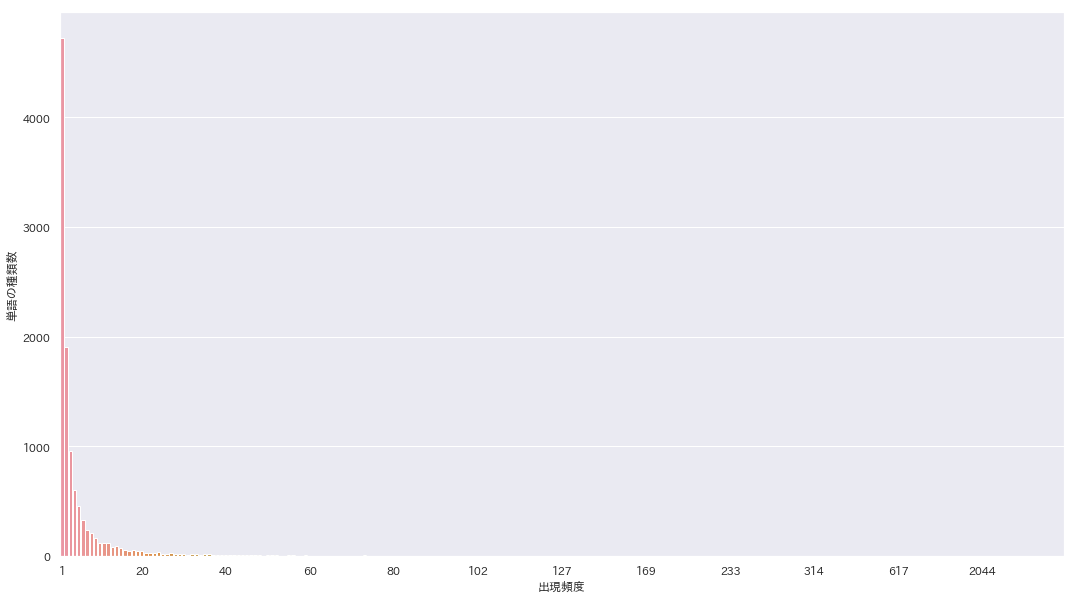

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax = sns.barplot(x='出現頻度', y='単語の種類数', data=df_freq_words, ax=ax)
ax.set_xticklabels(xlabels)
fig.show()

## 39. Zipf の法則

単語の出現頻度順位を横軸, その出現頻度を縦軸として, 両対数グラフをプロットせよ.

In [21]:
df_freq_words['出現頻度（対数）'] = np.log(df_freq_words['出現頻度'])
df_freq_words['単語の種類数（対数）'] = np.log(df_freq_words['単語の種類数'])

In [22]:
xlabels = [
    f"{freq:.2f}" if i == 1 or i % 20 == 0 else '' 
    for i, freq in enumerate(sorted(df_freq_words['出現頻度（対数）']), 1)
]

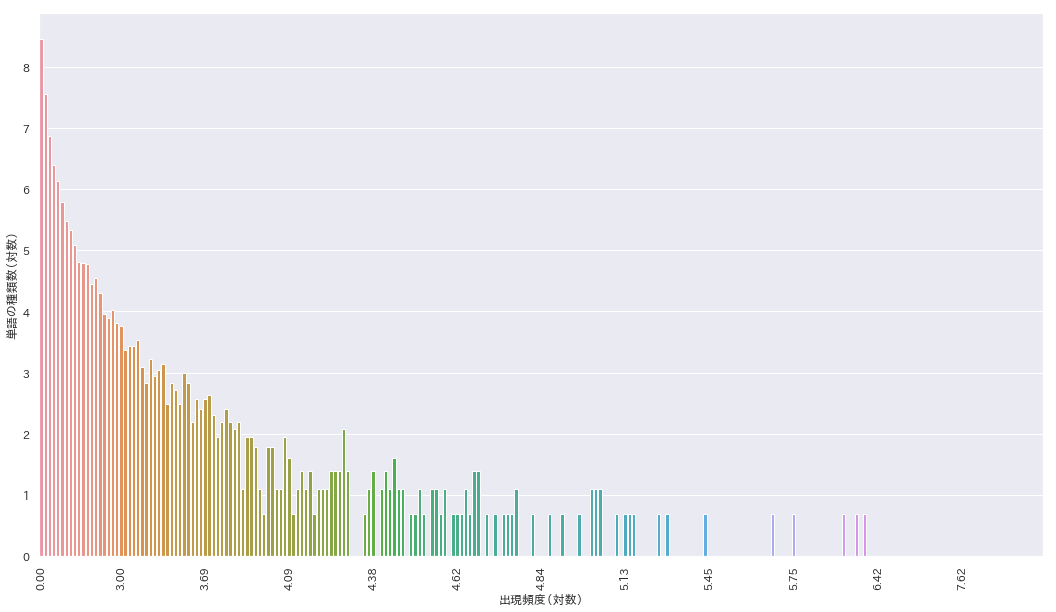

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax = sns.barplot(x='出現頻度（対数）', y='単語の種類数（対数）', data=df_freq_words, ax=ax)
ax.set_xticklabels(xlabels, rotation='vertical')
fig.show()